# 개요

* 아래의 목적/이유로 참가한 스터디에 대한 기록
  * SQLD취득 후 장기 미사용 & GPT를 통한 SQL사용 등으로 많이 잊은 SQL을 복기
  * 기존에 사용해 본 Optuna가 아닌 Autogluon이 커리큘럼에 있어 익혀보고자 함
  * 기존에 관심있던 XAI(설명가능한 AI)를 익히고자 함

* 3주차 요약
  * 금융데이터의 특징 및 케이스
  * EDA : 통계적 수치 확인과 시각화
  * 전처리 : 결측치/이상치 처리, 표준화, 정규화, 인코딩 등

* 참고사항 : 전부 보여야하는 데이터 외에는 head로 일부데이터만 표시

# 3주차 수업정리

## 금융데이터

### 금융데이터의 특징

* 정형성 : tabular데이터 형태로 적재, 최근 비정형 데이터 증가 추세
  * 별도의 스키마에 저장되어 있음
* 대규모 : 일 단위 적재데이터의 단위가 페타 바이트에 육박
  * Trino나 Presto등 대규모 처리 특화언어를 사용하게 됨
* 민감성 : 금융 당국의 규제, 보안에 대한 높은 수준요구
  * 데이터별 접근권한, 모든 조회기록 로그 등
* 폐쇄성 : 폐쇠망에서 처리되는 경우가 많음. AWS 등을 사용해도 Grey zone형태로 구축
  * 외부와 내부 폐쇄망 사이의 grey zone을 정보보호 및 IT인력이 관리
* 불균형성 : Target(Y)의 정보가 불균형

### 금융데이터 분야의 과제

* 최근 채용공고 기반의 금융데이터 관련 과제
  * 고객 행동 분석 및 예측
    * 카드추천알고리즘, 이탈예측, 고객 클러스터링 등
  * 리스크 관리 및 신용평가
    * 대출 상환 가능성 예측, 이상거래 탐지 등
  * 데이터 기반 마케팅 최적화
  * 비정형 데이터 분석
    * 콜센터상담 피드백분석, SNS데이터 감성분석 등
* 실무케이스 예시(회사별로 다름)
  * 협업Case : PM급 메인리더와 팀원의 협업
    * 리더가 데이터마트 설계, 팀원이 데이터마트 구축/완성
    * 모델링 작업, 앙상블 등의 베스트모델이나 기법을 각자 다른 방향으로 진행해봄
  * 개인작업Case
    * 퀀트같은 경우는 개인별로 시장 데이터 등을 분석하여 각자 전략구축

## EDA 이론

* EDA : 데이터가 어떻게 생겼는지, 통계적 수치의 확인 및 시각화 진행
  * 평균/중앙값
  * 최대/최소값
  * 사분위수
  * 왜도/첨도
  * 이상/결측치
  * 불균형도
  * 상관계수
  * 최빈값
  * 카테고리 개수, 카테고리별 개수

* 데이터에 따른 시각화 기법
  * Bar plot : 범주형 변수
  * Histogram : 연속형 변수 분포, 불균형도/왜도 분포, Y값의 분포
  * Line plot : 시계열 데이터의 분포, 시계열성 확인
  * Box plot : 이상치 확인, 일반적인 변수의 분포
  * Heatmap : Y와의 상관계수, 다중공선성 확인
    * 다중공선성은, 회귀분석에서의 기본가정인 독립 변수는 서로 독립적이어야 한다는 가정을 지킬 수 있는지 등을 확인하여 분석결과의 신뢰도를 높이고자 확인

## 전처리 이론

* 전처리 종류
  * 결측/이상값 처리
  * 표준화(Standardization)
  * 정규화(Normalization)
  * 변환(Transformation)
  * 인코딩
  * 구간화(Binning)

### 결측/이상값 처리

* 결측이 많지않다면 삭제할 수도 있으나, 일반적으로는 대체를 활용
  * Mean/Median Imputation: 수치형 변수 대체시 주로 사용
    * 평균/중앙값 중 어느 것을 쓸지는 데이터의 분포를 보고 결정
  * Mode Imputation: 범주형 변수 대체시 주로 사용
  * Zero Imputation : 0으로 대체(또는 -999처럼 특정값 사용)
  * Interpolation(보간법) : 시계열 데이터에서 전후 데이터를 활용
    * KNN이나 ML활용도 가능하지만 잘 사용되지 않았으나, AutoML의 발전으로 활용성이 높아짐
      * y를 예측하기 위해, x를 또 예측한다는 점에서 비효율적이었으나, AutoML 등의 발전으로 효율성이 높아짐 
* 이상값은 수가 적거나 예측에 해가 되는 경우가 많아 종종 삭제함
  * 유효성 검증이 되지 않아 생년월일 1800년대, 200살로 나오는 경우 등
  * **이상값이 유의미한 인사이트를 제공하는 경우**도 있음
    * 이상값을 결측값으로 대체한 뒤, is_outlier같은 추가변수 만들어줌
    * 변환을 통해 값의 분산을 줄이기도 함

### 표준화/정규화

* 표준화 vs 정규화
  * 표준화 : 데이터를 평균 0, 표준편차 1의 정규분포로 수정
  * 정규화 : 0~1 또는 -1~1의 분포로 수정
* 특성의 크기(Scale)의 차이로 인한 편향을 막기위해 사용
  * AI학습에서 Loss를 줄일 때, 변수 간의 Scale이 다르면 loss 및 학습에 영향이 생겨 성능저하가 일어날 수 있음
* **트리 기반의 알고리즘을 제외한 거의 대부분은 표준화/정규화 필요**
* 전통적으로 ML분야에서는 표준화를 선호하는 경향이 강함
  * When in doubt, just standardize the data, it shouldn’t hurt

### 변환

* 로그 변환, 로트 변환, Box-cox변환 등이 있음
  * Box-cox변환은, λ로 로그/제곱근 변환 등을 하나의 수식으로 표현가능한 '일반화'된 변환 방법
* 예를 들어, 왜도가 큰 경우 변환을 통해 낮추면 성능향상에 도움
  * **양의 왜도**(오른쪽으로 치우짐)의 경우 변환을 통해 그 정도를 낮춤
  * **음의 왜도**인 경우, 적당히 큰 값에서 데이터를 빼준 뒤 다시 변환
    * 단순 로그변환시 더 커지므로, 적당히 큰 값(Min/Max)을 빼줌
  * **데이터범위가 너무 넓은 경우, 루트 변환**으로 분산을 줄여줌
  * 캐글의 타이타닉 문제에서, y의 로그변환만 해도 정확도가 3%정도 오르는 케이스도 있음
  * ML은 통계학의 변환이라는 관점에서, 통계학은 정규성을 가정하는 경우가 많아 적절한 변환은 성능에 도움되는 경우가 많음

### 인코딩

* 수치형이 아닌 변수를 수치로 변환
  * One-hot Encoding : 범주형 변수의 Unique값을 변수(컬럼)로 변환
    * Sparcity증가의 문제(데이터 Loss는 없지만 학습이 오래걸림)
  * Label Encoding : 범주형 변수의 값을 숫자로 변환
    * 상하관계가 없는 데이터를 있다고 착각할 수 있음(상하관계없는 데이터에 1~3 부여 후 3이 높다고 판단할 수 있음)

### 구간화

* 수치형 변수를 구간으로 나누고, 범주화
* 장점 : 일반적으로 모델의 복잡도와, 이상값의 영향을 줄이는 효과
* 단점 : 구간 경계의 값은 해석의 손해가 있음
  * 구간의 크기/개수 설정은 초모수(하이퍼파라미터)이므로, 성능에 영향이 크므로 자주 사용되지는 않음(도메인 지식 필요)

## 기초통계 등 확인하기

### 데이터/패키지 로딩 및 자료형 등 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# pandas설정
pd.set_option('display.max_rows', 500)

# 데이터 로딩
data = pd.read_csv('application_train.csv')
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 통계적 수치 확인

#### 기초 통계량 확인

* pandas의 describe()
  * count : 결측치가 아닌 값의 개수
  * unique : 범주형 변수에 대해, unique한 값의 개수
  * top : 범주형 변수에 대해, 가장 많은 값
  * freq : 범주형 변수에 대해, 가장 많은 값의 개수
  * mean : 평균
  * std : 표준편차
  * min / 25% / 50% (median) / 75% / max : 최소값 / Q1 / 중앙값 / Q3 / 최대값

* 아래의 코드(describe)를 통해 다음과 같은 점을 생각해 볼 수 있음
  * Unique값이 있다는 것 → 범주형 변수라는 것
  * **대부분 컬럼이 정규화**된 것으로 추정
    * Min 0 / Max 1인 컬럼이 많음
    * 평균과 표준편차가 작은 편인 컬럼이 많음
  * 대부분 컬럼이 편향이 많이 있어보임
    * 예를 들어 **NAME_CONTRACT_TYPE**컬럼의 경우, unique 2 / count 307511 / frep 278232
  * (향후 로그변환을 위해)변수가 음수인지 양수인지 봐두기 

In [ ]:
data.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [8]:
basic_statistics = data.describe(include='all').transpose().reset_index()
basic_statistics.sort_values('unique')

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max
2,NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,EMERGENCYSTATE_MODE,161756,2,No,159428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,HOUSETYPE_MODE,153214,3,block of flats,150503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,FONDKAPREMONT_MODE,97216,4,reg oper account,73830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NAME_FAMILY_STATUS,307511,6,Married,196432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NAME_HOUSING_TYPE,307511,6,House / apartment,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 왜도 확인

* 수치형 변수만, skew함수로 왜도를 구할 수 있음
* 음의 왜도 확인하기 + 높은 양의 왜도 확인하기(10이 넘는 경우 왜도가 높은 편)
* 아래 코드의 결과를 기준으로, **왜도가 심하게 높은 주요 변수 → 이상치 여부를 시각화로 확인 필요**
  * AMT_INCOME_TOTAL : 391.559654
  * YEARS_BEGINEXPLUATATION_MEDI : -15.573124
  * FLAG_CONT_MOBILE : -23.081172
  *	FLAG_MOBIL : -554.536744

In [9]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
numeric_skew = numerical_data.skew().reset_index() # skew() 함수로 왜도 구하기
numeric_skew.columns = ['index','skewness']

ext_statistics = pd.merge(basic_statistics, numeric_skew, on='index', how='left')
ext_statistics.sort_values(by='skewness', ascending=False)

,index,count,unique,top,freq,mean,std,min,25%,50%,75%,max,skewness
106,FLAG_DOCUMENT_12,307511.0,NaN,NaN,NaN,0.000007,0.00255,0.0,0.0,0.0,0.0,1.0,392.114779
7,AMT_INCOME_TOTAL,307511.0,NaN,NaN,NaN,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0,391.559654
104,FLAG_DOCUMENT_10,307511.0,NaN,NaN,NaN,0.000023,0.004771,0.0,0.0,0.0,0.0,1.0,209.589054
96,FLAG_DOCUMENT_2,307511.0,NaN,NaN,NaN,0.000042,0.006502,0.0,0.0,0.0,0.0,1.0,153.791817
120,AMT_REQ_CREDIT_BUREAU_QRT,265992.0,NaN,NaN,NaN,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0,134.365776
98,FLAG_DOCUMENT_4,307511.0,NaN,NaN,NaN,0.000081,0.009016,0.0,0.0,0.0,0.0,1.0,110.894364
101,FLAG_DOCUMENT_7,307511.0,NaN,NaN,NaN,0.000192,0.01385,0.0,0.0,0.0,0.0,1.0,72.174108
111,FLAG_DOCUMENT_17,307511.0,NaN,NaN,NaN,0.000267,0.016327,0.0,0.0,0.0,0.0,1.0,61.214140
115,FLAG_DOCUMENT_21,307511.0,NaN,NaN,NaN,0.000335,0.018299,0.0,0.0,0.0,0.0,1.0,54.612939
114,FLAG_DOCUMENT_20,307511.0,NaN,NaN,NaN,0.000507,0.022518,0.0,0.0,0.0,0.0,1.0,44.364897


#### 결측치 확인

* isnull()을 활용한 결측치 확인

In [31]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


* 전체 데이터에서, 결측이 10% 이상인 컬럼 확인
  * 몇 퍼센트의 결측치를 볼지는 개인별 선택
* 결측치가 많으므로 단순히 Drop할 것이 아니라 Imputation(대체)이 필요함

In [ ]:
missing_data[missing_data.percent >= 10].shape[0]/missing_data.shape[0]

0.4672131147540984

#### 이상치 확인

* 결측치와 달리, 이상치는 기준을 정해야 함
  * 일반적으로 IQR을 기준으로 많이 작업(모수의 분포를 모르므로)
  * IQR(Q3-Q1)을 기준으로, $Q1 - 1.5*IQR$ 보다 작거나, $Q3 + 1.5*IQR$ 보다 크면 이상치라고 함
* 분위수를 구하는 quantile함수를 활용해, Q1, Q3, IQR을 직접 구하는 함수를 구현할 수 있음
* 이상치 확인할 때, 결측치 제외하는 것이 중요함

* 이상치 확인하기 (결측치 제외되지 않은 사례)
  * 이상치 비율이 비정상적으로 큰 것을 볼 수 있음

In [ ]:
def detect_outliers(df):
  outlier_flags = df.copy()
  for column in df.columns:
    col_data = df[column].dropna()  # 결측치 제외   → 이상치를 구하는데 영향을 끼치므로
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags[column] = df[column].apply(
        lambda x: not lower_bound <= x <= upper_bound
    )

  return outlier_flags

outliers_total = detect_outliers(numerical_data).sum().sort_values(ascending = False)
outliers_percent = (detect_outliers(numerical_data).sum()/detect_outliers(numerical_data).count()*100).sort_values(ascending = False)
outliers_data  = pd.concat([outliers_total, outliers_percent], axis=1, keys=['total', 'percent'])
outliers_data.head(10)

,total,percent
NONLIVINGAPARTMENTS_AVG,229094,74.499449
NONLIVINGAPARTMENTS_MEDI,228729,74.380754
NONLIVINGAPARTMENTS_MODE,227738,74.058489
COMMONAREA_MEDI,222869,72.475131
COMMONAREA_AVG,222807,72.454969
COMMONAREA_MODE,222803,72.453668
LIVINGAPARTMENTS_MEDI,218126,70.932747
LIVINGAPARTMENTS_AVG,218080,70.917788
LIVINGAPARTMENTS_MODE,217668,70.783809
FLOORSMIN_MEDI,208986,67.960496


* 이상치 확인하기 (결측치 제외된 사례)
  * 이상치의 비중이 26, 25%와 같이 높은 편으로, 단순히 제거하여 해결하는 것은 좋지 않음
  * 시각화까지 진행해보고, 이후 방향을 결정

In [12]:
def detect_outliers_wo_nan(df):
  outlier_flags = df.copy()
  for column in df.columns:
    col_data = df[column].dropna()  # 결측치 제외
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags[column] = df[column].apply(
        lambda x: not lower_bound <= x <= upper_bound if pd.notna(x) else False
    )

  return outlier_flags

In [22]:
outliers_total = detect_outliers_wo_nan(numerical_data).sum().sort_values(ascending = False)
outliers_percent = (detect_outliers_wo_nan(numerical_data).sum()/detect_outliers_wo_nan(numerical_data).count()*100).sort_values(ascending = False)
outliers_data  = pd.concat([outliers_total, outliers_percent], axis=1, keys=['total', 'percent'])
outliers_data.head(10)

,total,percent
REGION_RATING_CLIENT,80527,26.186706
REGION_RATING_CLIENT_W_CITY,78027,25.373726
DAYS_EMPLOYED,72217,23.484363
REG_CITY_NOT_WORK_CITY,70867,23.045354
FLAG_WORK_PHONE,61308,19.936848
FLAG_EMP_PHONE,55386,18.011063
LIVE_CITY_NOT_WORK_CITY,55215,17.955455
AMT_REQ_CREDIT_BUREAU_QRT,50575,16.446566
AMT_REQ_CREDIT_BUREAU_MON,43759,14.230060
DEF_30_CNT_SOCIAL_CIRCLE,35166,11.435688


#### 심화1 : 벡터연산을 통한 최적화 (기존 이상치 연산과 비교)

* pandas를 반복문 대신 벡터연산(numpy)으로 빠르게 처리할 수 있음
  * apply함수 : 각 행/열을 독립적으로 처리하는 벡터화 함수
* 하단 코드는 벡터연산 적용한 이상치 찾는 함수 vs 기존의 이상치 찾는 함수의 비교

In [13]:
def detect_outliers_fast(df):
    # Calculate IQR without NaN values
    Q1 = df.quantile(0.25, interpolation='midpoint')
    Q3 = df.quantile(0.75, interpolation='midpoint')
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Vectorized outlier detection with NaN handling
    outlier_flags = df.apply(
        lambda col: ~col.between(lower_bound[col.name], upper_bound[col.name]) & col.notna()
    )
    return outlier_flags

In [14]:
%%time
detect_outliers_wo_nan(numerical_data).head(5)  # 기존의 (벡터연산 미적용된) 코드

CPU times: total: 13.8 s
Wall time: 14.5 s


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
%%time
detect_outliers_fast(numerical_data).head(5)  # 벡터연산 적용한 코드

CPU times: total: 797 ms
Wall time: 867 ms


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 심화2 : Polars

* 대용량 데이터 처리에 특화된 Polars
  * pandas와 비슷한 문법, 대부분의 경우 pandas보다 빠른 연산
  * 광범위하게 쓰이진 않지만, 대용량 데이터 처리에는 유용함

In [ ]:
!pip install polars

   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   -- ------------------------------------- 2.4/32.8 MB 11.2 MB/s eta 0:00:03
   ----- ---------------------------------- 4.7/32.8 MB 11.4 MB/s eta 0:00:03
   -------- ------------------------------- 7.3/32.8 MB 11.6 MB/s eta 0:00:03
   --------- ------------------------------ 7.9/32.8 MB 9.2 MB/s eta 0:00:03
   ----------- ---------------------------- 9.7/32.8 MB 9.2 MB/s eta 0:00:03
   --------------- ------------------------ 12.3/32.8 MB 9.6 MB/s eta 0:00:03
   ----------------- ---------------------- 14.7/32.8 MB 9.9 MB/s eta 0:00:02
   --------------------- ------------------ 17.3/32.8 MB 10.2 MB/s eta 0:00:02
   ----------------------- ---------------- 19.7/32.8 MB 10.3 MB/s eta 0:00:02
   -------------------------- ------------- 22.0/32.8 MB 10.6 MB/s eta 0:00:02
   ---------------------------- ----------- 23.6/32.8 MB 10.2 MB/s eta 0:00:01
   ------------------------------- -------- 26.2/32.8 MB 10.3 MB/s eta

In [18]:
# Polars 활용한 코드
import polars as pl

numerical_data_polars = pl.from_pandas(numerical_data)

def detect_outliers_polars(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_flags = df.with_columns(
        [
            ~((pl.col(col) >= lower_bound[col]) & (pl.col(col) <= upper_bound[col])) # 범위 계산
            .fill_null(False) # 결측치 제외   → null을 넣지않고 삭제
            .alias(col) # 기존 열 이름 유지
            for col in df.columns
        ]
    )
    return outlier_flags

In [19]:
%%time
detect_outliers_polars(numerical_data_polars).head(5)

CPU times: total: 1.02 s
Wall time: 266 ms


SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,…,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,…,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
false,true,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,…,false,false,false,false,false,false,false,true,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,true,true,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,…,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,true,true,true,true,true,…,true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,true,true,true,true,true,true,…,true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,true,true,true,true,true
false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,true,true,false,true,true,true,true,true,true,…,true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


#### y의 불균형도 확인

* pandas의 value_counts : SQL의 group by + count

In [ ]:
data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

## 실습1 : 확인한 통계량을 가지고 시각화 고민하기

* 지금까지 본 수치를 기반으로 각 변수별로 어떤 시각화가 필요할지 고민해봅시다.
  * 범주형 변수(describe기준 unique값 있는 경우)에 대해 barplot
  * 대부분 변수에 대해 Histogram으로 분포 확인
  * 결측치(Null)을 제외한 후 Box plot으로 이상치 확인
  * Heatmap을 활용한 상관계수 확인

In [ ]:
data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


## 시각화

* 일단 기본적인 histogram, barplot을 그려보기
  * 수치형 변수는 histogram, 범주형 변수는 bar plot
  * select_dtypes 활용

### Histogram

* 수치형데이터에 대해 histogram 그리기
* Matplotlib와 Seaborn으로 나누어 실습

In [29]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


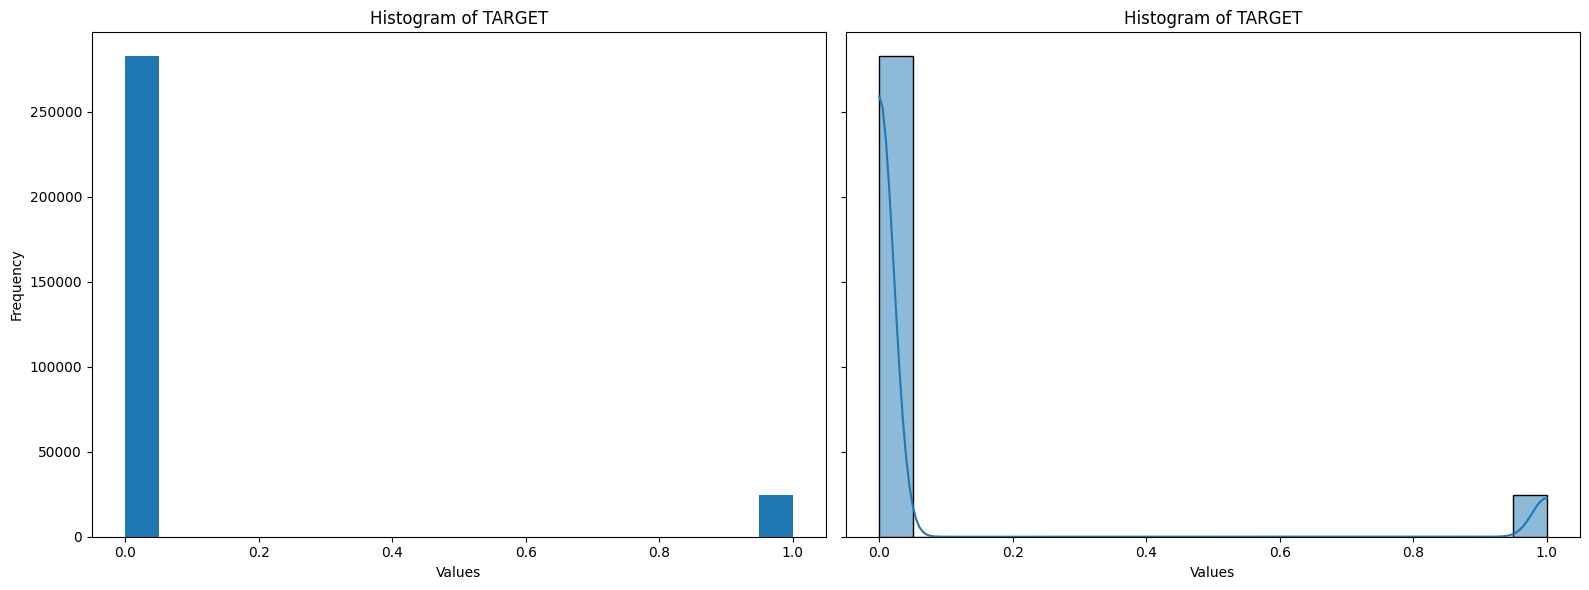

In [ ]:
# Matplotlib와 Seaborn 그래프
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
var_idx = 1
var_nm = numeric_data.columns[var_idx]

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 코드 1: Matplotlib Graph (좌측)
axes[0].hist(numeric_data[var_nm], bins='auto')
axes[0].set_title(f'Histogram of {var_nm}')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# 코드 2: Seaborn Graph (우측)
sns.histplot(data[var_nm], kde=True, bins='auto', ax=axes[1])
axes[1].set_title(f'Histogram of {var_nm}')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')

# 전체 그래프 간격 조정
plt.tight_layout()
plt.show()

* 0~1 사이에 분포하는 컬럼이 많음 → 많은 컬럼이 정규화 되어있음
* 앞서 왜도가 높았던 컬럼의 확인 결과
  * AMT_INCOME_TOTAL(391.559654) : 식별이 어려워 bin값 조정필요
  * YEARS_BEGINEXPLUATATION_MEDI(-15.573124) : 왜도와 달리 값이 치우치지 않아보임
  * FLAG_CONT_MOBILE(-23.081172) : 왜도와 달리 값이 치우치지 않아보임
  * FLAG_MOBIL(-554.536744) : 왜도와 달리 값이 치우치지 않아보임

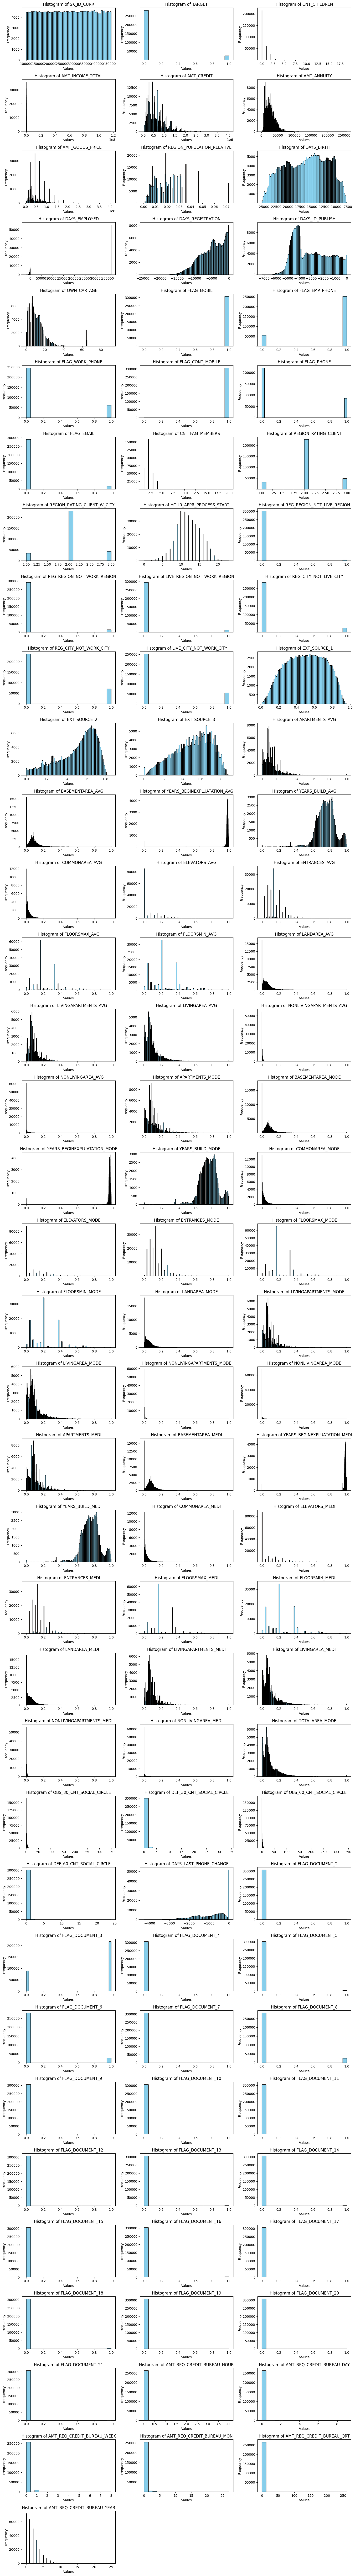

In [ ]:
import math

# 설정: 가로 그래프 개수
cols = 3
num_vars = len(numeric_data.columns)
rows = math.ceil(num_vars / cols)  # 필요한 행(row) 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))  # 전체 figure 크기 조정
axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱싱 편리하게

# 그래프 그리기
for var_idx, var_nm in enumerate(numeric_data.columns):
    ax = axes[var_idx]
    ax.hist(numeric_data.iloc[:, var_idx], bins='auto', color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {var_nm}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# 빈 서브플롯 숨기기
for i in range(num_vars, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 실습2 : 시각화 실습

* AMT_INCOME_TOTAL을 다시 시각화해봅시다. bins 변수를 적절히 조정해서 잘 보이게 해봅시다.

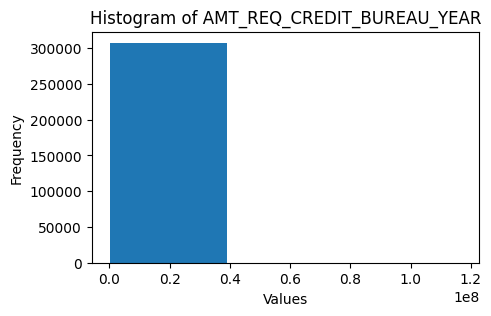

In [ ]:
var_idx = 3

plt.figure(figsize=(5, 3))
plt.hist(numeric_data.iloc[:,var_idx], bins=3) # 컬럼명 기준으로 인덱싱시 발생할 수 있는 오류 예방.
plt.title(f'Histogram of {var_nm}')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### Barplot

* `plt.bar` or `sns.barplot`으로 시각화

In [41]:
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_data.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


* 하단의 범주형변수 시각화를 통해 알 수 있는 점
  * 대체로 불균형한 분포를 보임
  * 대부분 unique값이 많지 않아, one-hot인코딩에 크게 문제가 없어보임
  * Education_type은 순위가 있는 변수이므로 인코딩할 때 유의

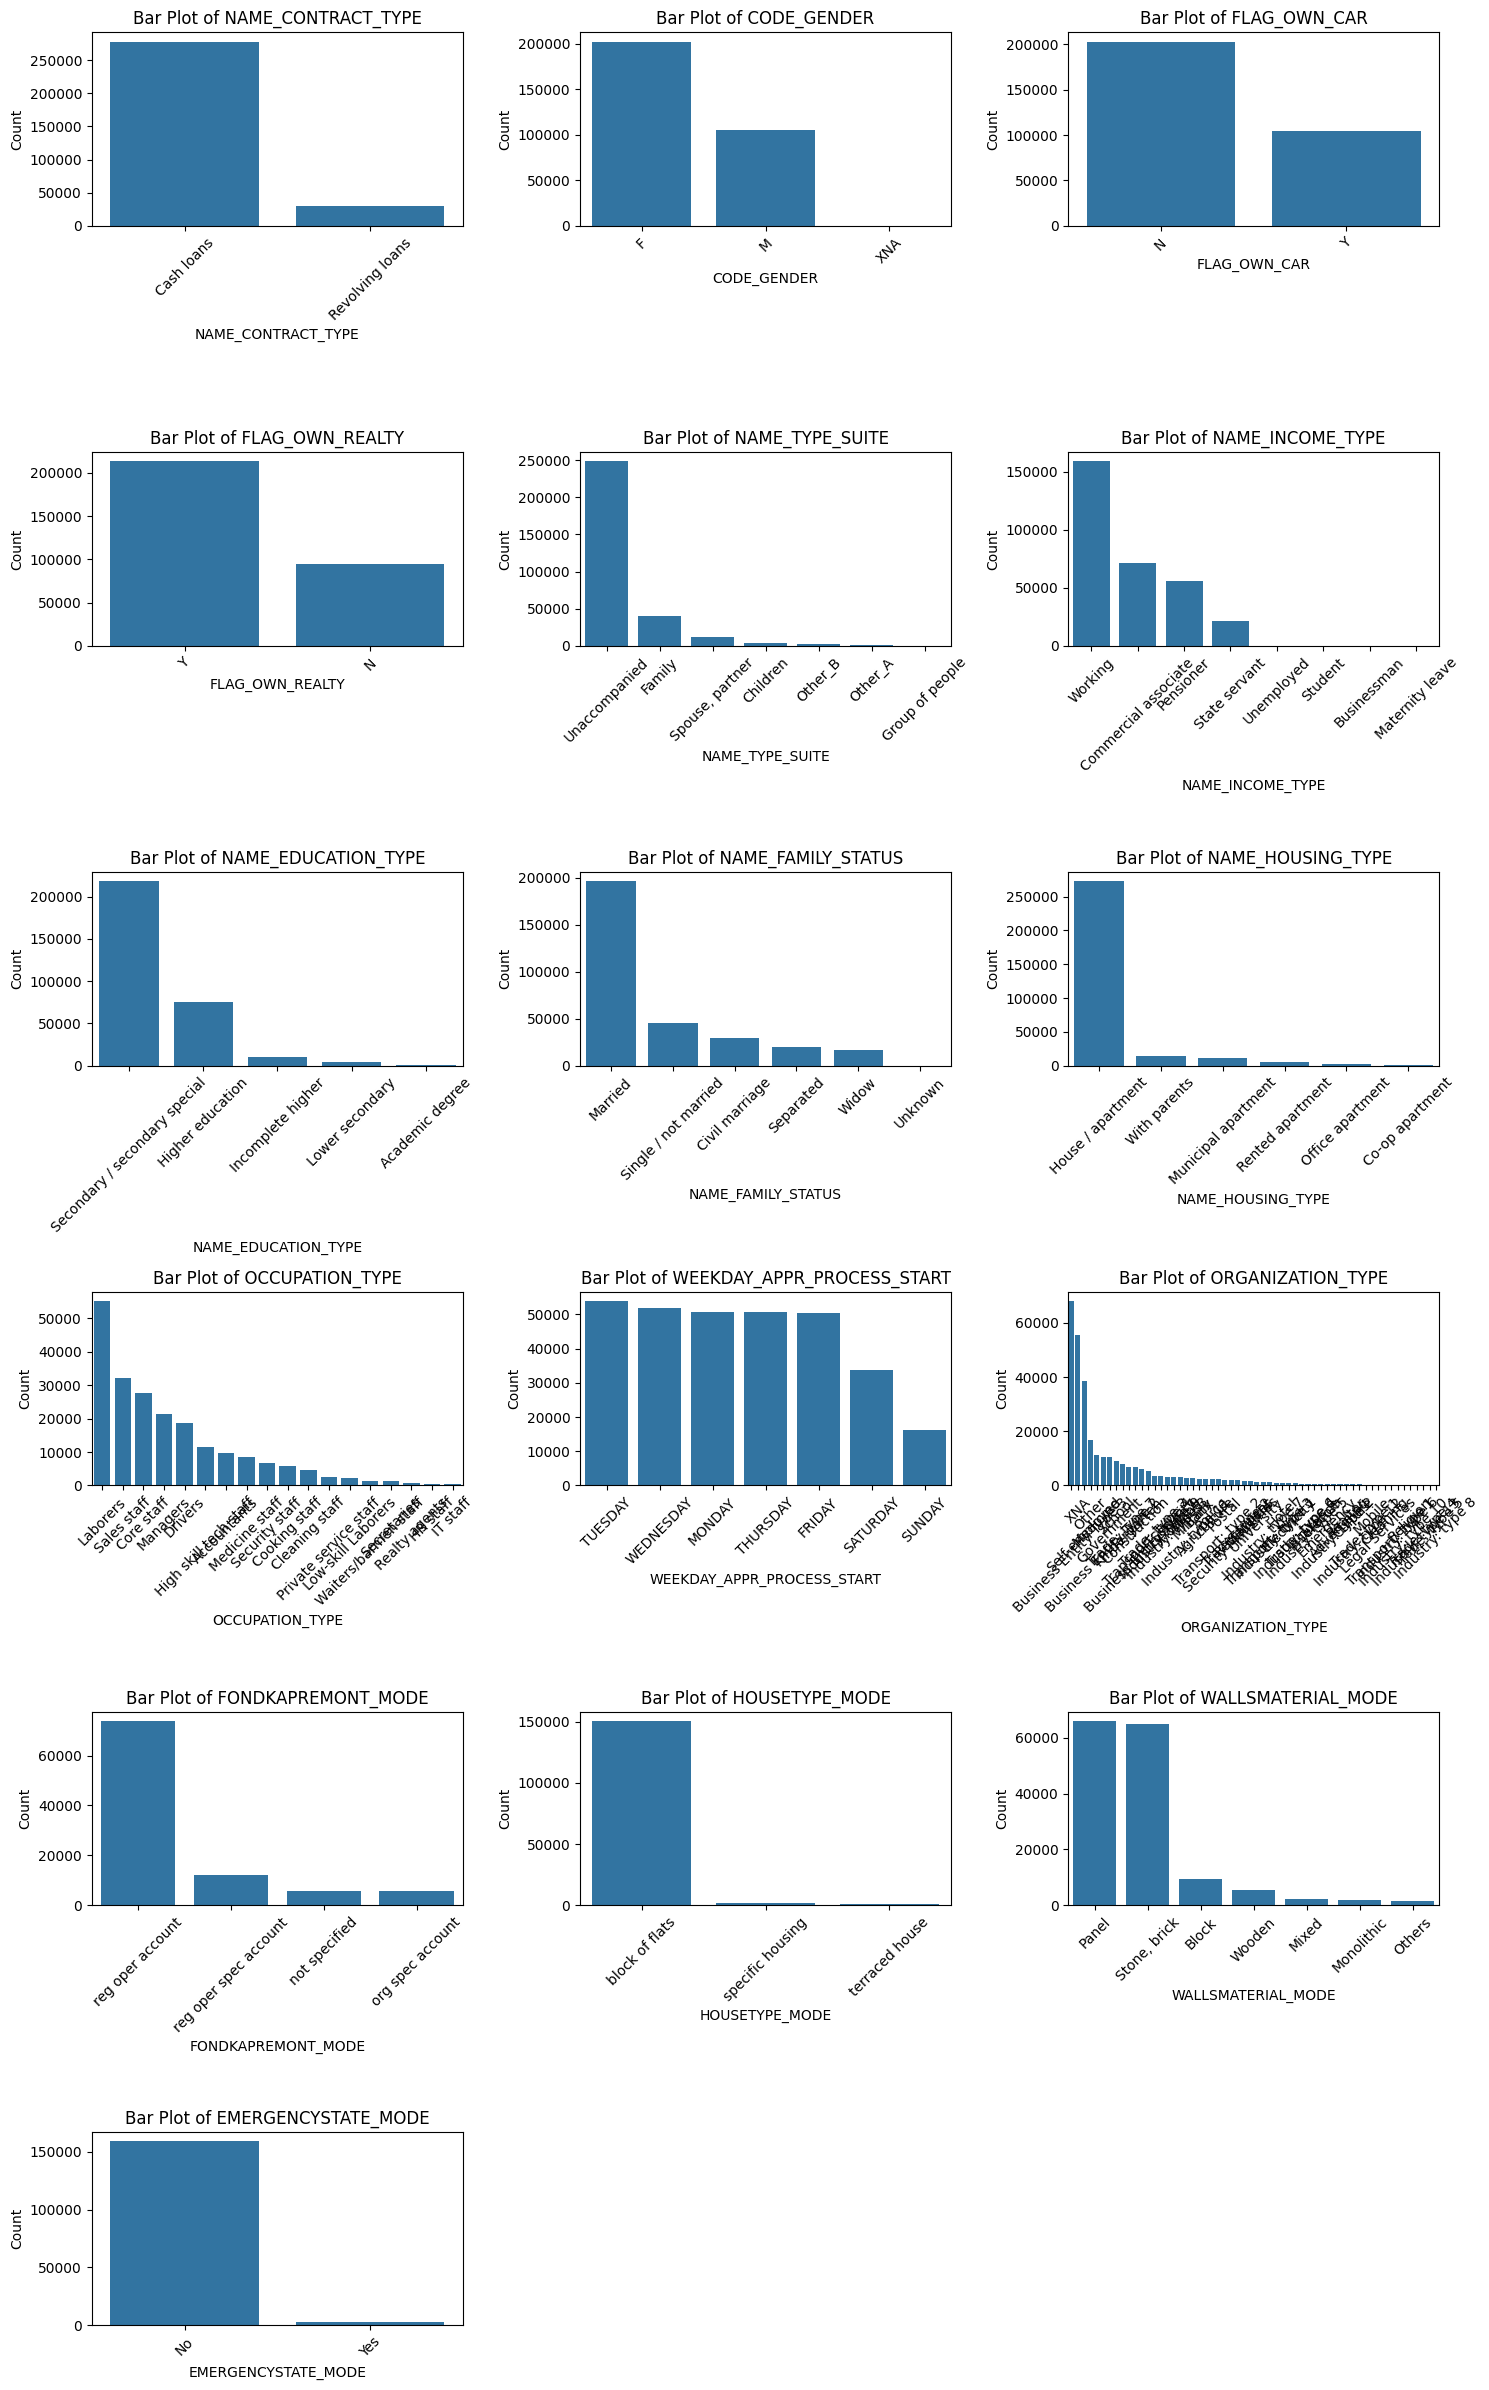

In [ ]:
# 설정: 가로 그래프 개수
cols = 3
num_vars = len(categorical_data.columns)
rows = math.ceil(num_vars / cols)  # 필요한 행(row) 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # 전체 figure 크기 조정
axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱싱 편리하게

# 그래프 그리기
for var_idx, var_nm in enumerate(categorical_data.columns):
    ax = axes[var_idx]
    value_counts = categorical_data[var_nm].value_counts().reset_index()
    value_counts.columns = [var_nm, 'Count']
    sns.barplot(x=var_nm, y='Count', data=value_counts, ax=ax)
    ax.set_title(f'Bar Plot of {var_nm}')
    ax.set_xlabel(var_nm)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# 빈 서브플롯 숨기기
for i in range(num_vars, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

* Target(y)값 기준으로 나누어서(Stack) 그릴 수도 있음

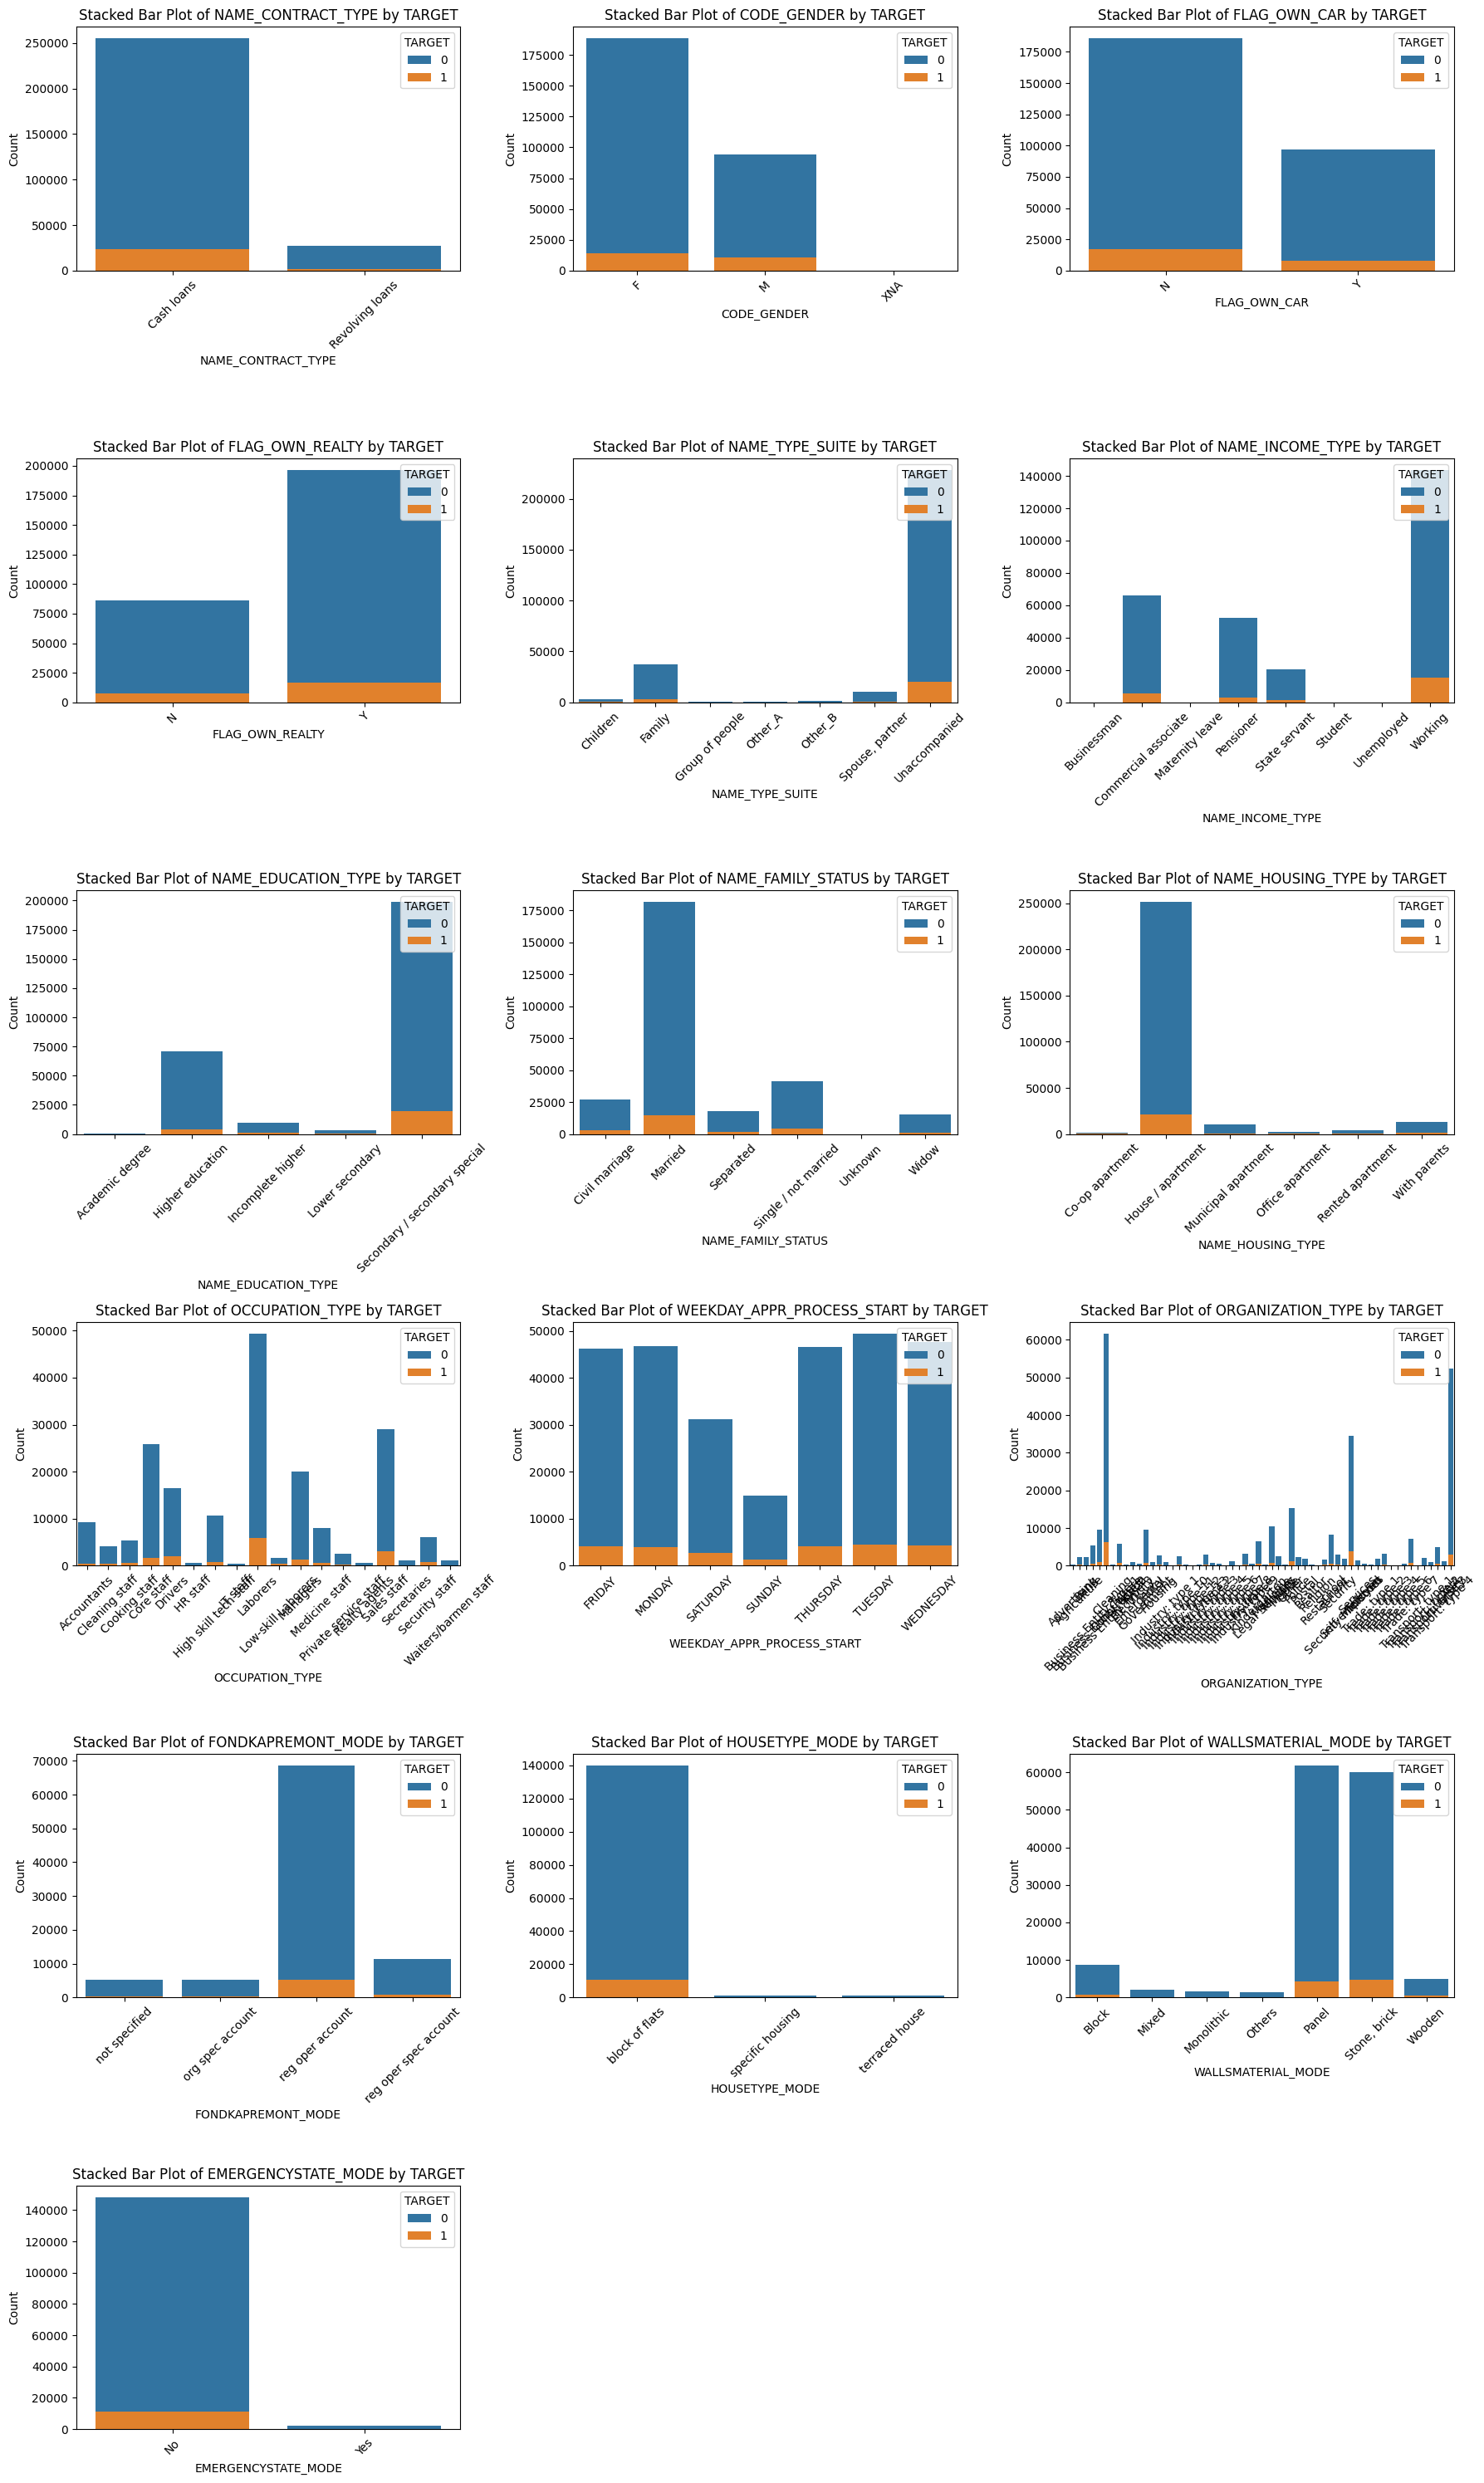

In [ ]:
# TARGET 데이터 합치기
combined_data = categorical_data.copy()
combined_data['TARGET'] = data['TARGET']  # 동일한 인덱스를 기준으로 TARGET 추가

# 설정: 가로 그래프 개수
cols = 3
num_vars = len(categorical_data.columns)
rows = math.ceil(num_vars / cols)  # 필요한 행(row) 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))  # 전체 figure 크기 조정
axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱싱 편리하게

# 그래프 그리기
for var_idx, var_nm in enumerate(categorical_data.columns):
    ax = axes[var_idx]
    # 데이터 그룹화 및 카운트 계산
    stacked_data = combined_data.groupby([var_nm, 'TARGET']).size().reset_index(name='Count')
    sns.barplot(x=var_nm, y='Count', hue='TARGET', data=stacked_data, dodge=False, ax=ax)
    ax.set_title(f'Stacked Bar Plot of {var_nm} by TARGET')
    ax.set_xlabel(var_nm)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='TARGET', loc='upper right')

# 빈 서브플롯 숨기기
for i in range(num_vars, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 실습3
- y도 시각화 해봅시다.

<Axes: xlabel='TARGET', ylabel='count'>

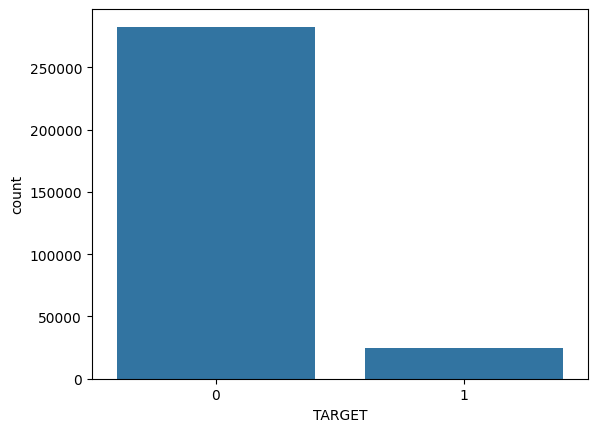

In [ ]:
sns.countplot(x='TARGET', data=data)

### Boxplot

* `sns.boxplot` or `plt.boxplot`로 시각화 가능
* 이상치에 대해 시각화 (10%가 넘는 경우 시각화 해보기)
* 아래 boxplot 시각화를 기준으로
  * 0이나 1이 너무 많아, 일반적인 boxplot형태는 아님
  * DAYS_EMPLOYED는 음의 값이 존재
  * **Drop이 아닌 변환으로 진행**

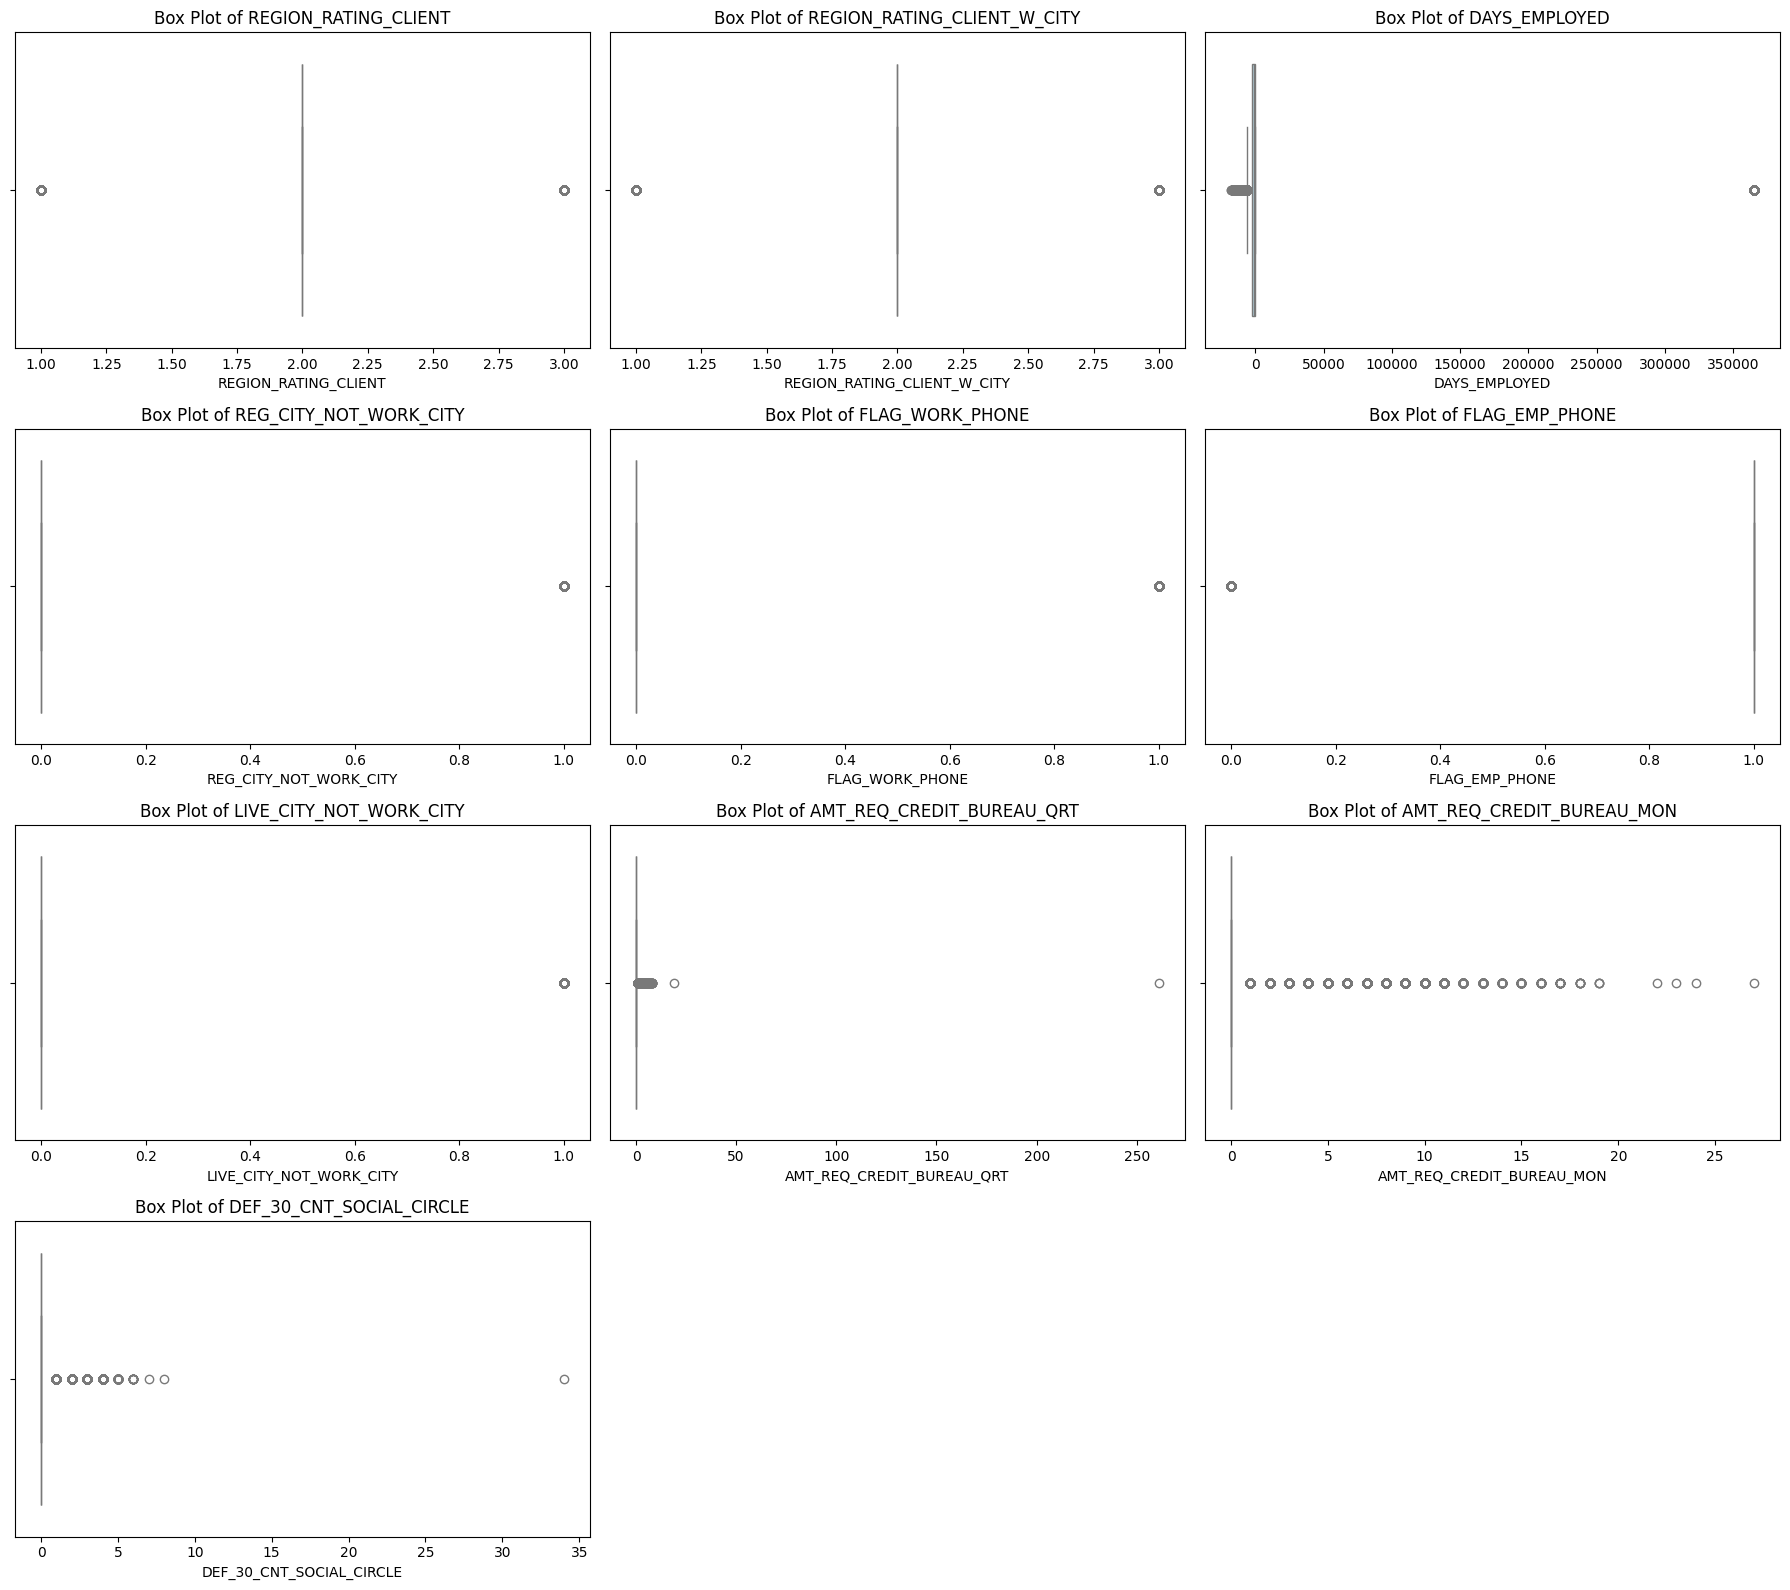

In [23]:
import math

outliers_over_10 = outliers_data[outliers_data.percent > 10]

# 설정: 가로 그래프 개수
cols = 3
num_vars = len(outliers_over_10.index)
rows = math.ceil(num_vars / cols)  # 필요한 행(row) 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))  # 전체 figure 크기 조정
axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱싱 편리하게

# 그래프 그리기
for var_idx, var_nm in enumerate(outliers_over_10.index):
    ax = axes[var_idx]
    sns.boxplot(x=data[var_nm], ax=ax, color='lightblue')
    ax.set_title(f'Box Plot of {var_nm}')
    ax.set_xlabel(var_nm)

# 빈 서브플롯 숨기기
for i in range(num_vars, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### lineplot

* 사용중인 데이터가 시계열 데이터가 아니므로, 임의의 데이터로 시각화

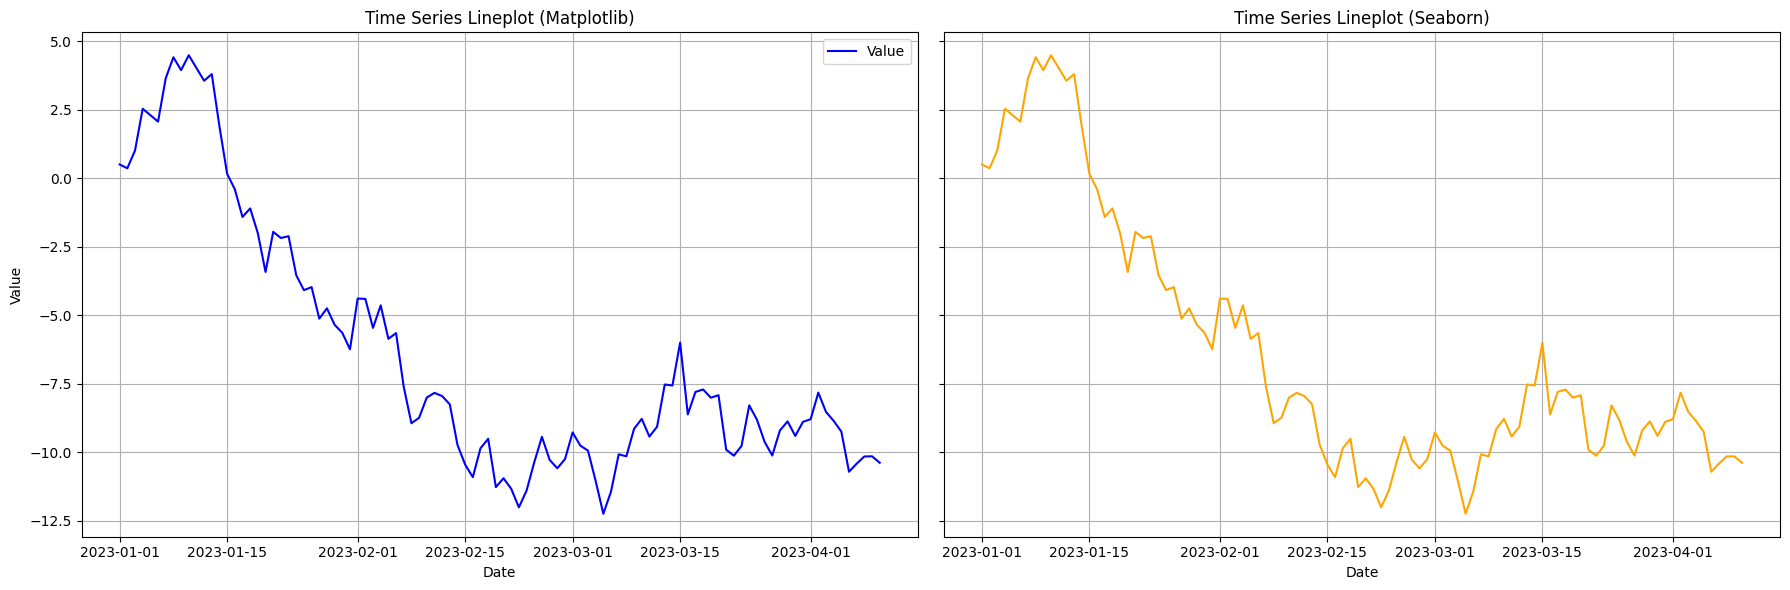

In [ ]:
# Generate random time series data
np.random.seed(42)
time_series_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Value': np.cumsum(np.random.randn(100))  # Cumulative sum of random values
})

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# 코드 1: Matplotlib
axes[0].plot(time_series_data['Date'], time_series_data['Value'], color='blue', label='Value')
axes[0].set_title('Time Series Lineplot (Matplotlib)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True)

# 코드 2: Seaborn
sns.lineplot(x='Date', y='Value', data=time_series_data, color='orange', ax=axes[1])
axes[1].set_title('Time Series Lineplot (Seaborn)')
axes[1].set_xlabel('Date')
axes[1].grid(True)

# 그래프 간격 조정
plt.tight_layout()
plt.show()

### Heatmap

* y변수와의 상관계수를 시각화, 수치형&수치형 변수일 때 사용
* seaborn만 가능(matplotlib불가)
* 사용중인 데이터의 y가 binary이므로, 임의 데이터로 시각화

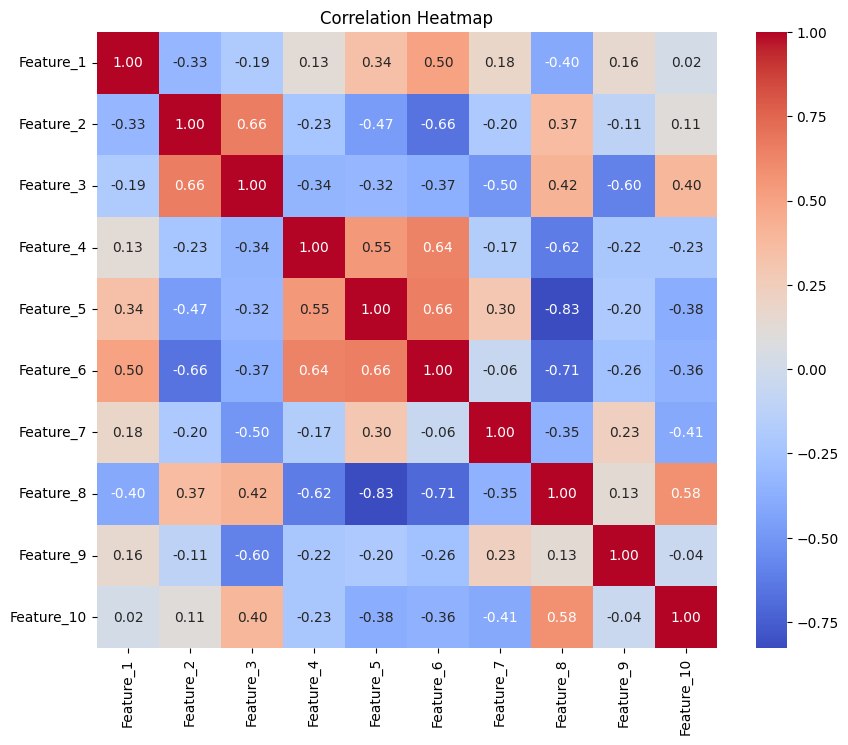

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a random example dataset
np.random.seed(42)
example_data = pd.DataFrame(
    np.random.rand(10, 10),
    columns=[f'Feature_{i+1}' for i in range(10)]
)

# Calculate the correlation matrix
correlation_matrix = example_data.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## 실습4 : 시각화 결과를 바탕으로, 전처리 고민하기

* 지금까지의 시각화 결과를 바탕으로 변수별로 어떤 전처리가 필요할지, 전처리 계획을 세워봅시다.
  * 많은 컬럼이 정규화되어있음
  * 왜도가 높았던 변수가 있었지만, 시각화해보니 값이 치우치지는 않았음
  * 이상치 데이터가 많은 편으로, 단순히 제거하는 것은 옳지 않음
  * 순위가 있는 Education_type은 인코딩할 때 주의(순위있는 변수)
  * unique값이 많지 않은 경우는 원핫인코딩도 고려

## 전처리

### 이상값, 결측값 처리

* Drop 또는 변환을 통해 처리
  * 현재 사용중인 데이터는 Drop보다는 변환이 적절
  * pandas fillna()를 활용
* 정규화 여부로 변수 나눠보기
  * 정규화 여부에 따라 채워넣을 값이 달라지기 때문

In [32]:
# 결측치가 있는 컬럼 : 결측 데이터 비율 0% 초과
missing_data_cols = missing_data[missing_data.percent > 0].index.tolist()
missing_data_cols

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [33]:
# 최소 0 /최대 1인 값을 찾는 mask (정규화 되어있는)
min_max_mask = (numeric_data.min() == 0) & (numeric_data.max() == 1)

df_min_max_0_1 = numeric_data.loc[:, min_max_mask]
df_min_max_0_1.head(5)

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_min_max_0_1.columns

Index(['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'Y

In [35]:
# 앞서 만든 mask의 값과 다른(~) dataframe 구하기 (정규화되어있지 않은)
df_other = numeric_data.loc[:, ~min_max_mask]
df_other.head(5)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_other.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

* 정규화 된 vs 되지 않은 변수에 대한 처리 방안
  * 정규화된 변수(df_min_max_0_1.columns)는 도시, 아파트 등 거주지에 관련된 변수
    * 평균이나 0으로 대체할 수 있음
    * 아예 다른 -1 등으로 대체하여, 모델에게 일반적인 값이 아니라고 알려줄 수 있음
  * 정규화되지 않은 변수(df_other.columns)는 공통적이지 않아 위처럼 일괄적용은 불가
    * 무난하게 평균으로 대체(Imputation)

In [36]:
# 정규화된 데이터(df_min_max_0_1) : -1로 채우기
df_min_max_0_1_filled = df_min_max_0_1.fillna(-1)

# 정규화되지 않은 데이터( : )df_other) : 평균으로 채우기
df_other_filled = df_other.fillna(df_other.mean())

# 두 데이터 다시 합치기
numeric_data_filled = pd.concat([df_min_max_0_1_filled, df_other_filled], axis = 1)
numeric_data_filled = numeric_data_filled[numeric_data.columns]
numeric_data_filled.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# 결측치 존재여부 확인하기 : 없음
numeric_data_filled.isna().sum()

SK_ID_CURR                      0
TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
EXT_SOURCE_1  

### 표준화 / 정규화

* 현재 이용중인 데이터는 정규화가 되어있어, 더미 데이터로 정규화 실습

In [ ]:
# 필요한 라이브러리 임포트
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. 데이터 생성
# make_classification을 사용해 극단적인 스케일 차이를 가진 데이터를 생성
X_extreme, y_extreme = make_classification(
    n_samples=10000,            # 데이터 샘플 수
    n_features=40,             # 전체 피처 수
    n_informative=10,           # 유용한 피처 수
    scale=[10, 10000, 0.1, 0.001] * 10,  # 피처별 스케일 조정
    random_state=42            # 재현 가능성을 위한 시드값
)

In [ ]:
pd.DataFrame(X_extreme).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,10000.0,-0.000843,0.099991,-0.400455,-0.068812,-9.649203e-04,0.065022,0.345748
1,10000.0,-0.049159,0.203922,-1.028082,-0.186545,-4.998679e-02,0.087477,0.696282
2,10000.0,0.098310,9.967478,-37.084345,-6.431134,2.068342e-01,6.805382,36.569668
3,10000.0,0.000092,0.100792,-0.376615,-0.068290,1.600637e-03,0.066608,0.370791
4,10000.0,33.711066,9968.009346,-37924.222059,-6660.572565,2.665940e+01,6718.807581,38249.915049
5,10000.0,-0.014777,10.035188,-44.042140,-6.791118,-1.207864e-03,6.879935,34.238262
6,10000.0,0.004445,0.348834,-1.327898,-0.224403,4.139092e-03,0.240916,1.279965
7,10000.0,-29.276123,9901.953926,-34920.171700,-6780.256223,5.289047e+01,6660.789736,35896.144788
8,10000.0,5012.027982,20322.028651,-72656.674262,-8177.712578,5.592046e+03,19130.519205,87719.082190
9,10000.0,5.235305,21.577716,-94.872061,-8.381620,6.028815e+00,19.905182,86.318571


* 변수별로 scale차이가 큰 데이터가 만들어졌고, 로지스틱 회귀 모델에 넣어볼 예정
* 표준화와 정규화 부분에 집중해서 보기(나머지는 추후 배움)
* **표준화**는 `sklearn.preprocessing`의 `StandardScaler`로, **정규화**는 `MinMaxScaler`로 수행

In [ ]:
# 2. 데이터 분리
# 학습 데이터와 테스트 데이터로 분리
X_train_extreme, X_test_extreme, y_train_extreme, y_test_extreme = train_test_split(
    X_extreme, y_extreme, test_size=0.3, random_state=42
)

# 3. 로지스틱 회귀 모델 초기화
model_lr_extreme = LogisticRegression(random_state=42, max_iter=1000)

# 4. 원본 데이터로 예측 (Raw Data)
# 스케일링 없이 원본 데이터를 사용해 모델 학습
model_lr_extreme.fit(X_train_extreme, y_train_extreme)
y_pred_raw_extreme_lr = model_lr_extreme.predict(X_test_extreme)
accuracy_raw_extreme_lr = accuracy_score(y_test_extreme, y_pred_raw_extreme_lr)

# 5. 표준화된 데이터로 예측 (Standardized Data)
# 표준화를 적용한 데이터를 사용해 모델 학습
scaler_standard = StandardScaler()
X_train_extreme_standardized = scaler_standard.fit_transform(X_train_extreme) # fit을 통해 0~4의 값이 min/max 0/4임을 구하고, transform으로 0~1로 변경
X_test_extreme_standardized = scaler_standard.transform(X_test_extreme)

model_lr_extreme.fit(X_train_extreme_standardized, y_train_extreme)
y_pred_standardized_extreme_lr = model_lr_extreme.predict(X_test_extreme_standardized)
accuracy_standardized_extreme_lr = accuracy_score(y_test_extreme, y_pred_standardized_extreme_lr)

# 6. 정규화된 데이터로 예측 (Normalized Data)
# 정규화를 적용한 데이터를 사용해 모델 학습
scaler_minmax = MinMaxScaler()
X_train_extreme_normalized = scaler_minmax.fit_transform(X_train_extreme)
X_test_extreme_normalized = scaler_minmax.transform(X_test_extreme)

model_lr_extreme.fit(X_train_extreme_normalized, y_train_extreme)
y_pred_normalized_extreme_lr = model_lr_extreme.predict(X_test_extreme_normalized)
accuracy_normalized_extreme_lr = accuracy_score(y_test_extreme, y_pred_normalized_extreme_lr)

# 7. 결과 비교
# 결과를 데이터프레임으로 정리
results_extreme_lr = {
    "Method": ["Raw Data", "Standardized Data", "Normalized Data"],
    "Accuracy": [accuracy_raw_extreme_lr, accuracy_standardized_extreme_lr, accuracy_normalized_extreme_lr],
}

results_extreme_lr_df = pd.DataFrame(results_extreme_lr)
results_extreme_lr_df

c:\Users\kibok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Method,Accuracy
0,Raw Data,0.692333
1,Standardized Data,0.803000
2,Normalized Data,0.803667


### 변환

* 앞서 확인한 사실 : 일부 데이터의 치우침(왜도), 이상치, DAYS_EMPLOYED를 제외하면 전부 양수
* 위와 같은 경우 변환을 할 수 있으며, 로그변환과 제곱근 변환 중 일반적으로 쓰이는 로그변환을 사용
* `np.log1p`를 사용 :  log(x + 1)를 정밀하게 연산하는 함수로, 값이 0에 가까울수록 무한대로 발산하는 것을 막기위해  log1p를 사용
  * 손실없이 계산하기 위해 log1p를 사용

In [ ]:
outliers_over_10

,total,percent
REGION_RATING_CLIENT,80527,26.186706
REGION_RATING_CLIENT_W_CITY,78027,25.373726
DAYS_EMPLOYED,72217,23.484363
REG_CITY_NOT_WORK_CITY,70867,23.045354
FLAG_WORK_PHONE,61308,19.936848
FLAG_EMP_PHONE,55386,18.011063
LIVE_CITY_NOT_WORK_CITY,55215,17.955455
AMT_REQ_CREDIT_BUREAU_QRT,50575,16.446566
AMT_REQ_CREDIT_BUREAU_MON,43759,14.230060
DEF_30_CNT_SOCIAL_CIRCLE,35166,11.435688


In [24]:
log_transform_columns = outliers_over_10.index.tolist()
log_transform_columns.remove('DAYS_EMPLOYED')
log_transform_columns

['REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_WORK_PHONE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DEF_30_CNT_SOCIAL_CIRCLE']

In [37]:
numeric_data_filled[log_transform_columns]  = numeric_data_filled[log_transform_columns].apply(lambda x : np.log1p(x))

In [38]:
numeric_data_filled.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.006402,0.007,0.034362,0.236964,0.235447,1.899974
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


### 실습 5

* DAYS_EMPOLYED 같이 음수의 값을 갖는 경우, 최소값 조정이라는 걸 통해 변환해줄 수 있습니다.
* 쉽게 말해 최소값의 절대값보다 큰 수 C를 모든 데이터에 더하는 걸 말합니다.
* 구현한 뒤에 로그변환을 해봅시다.

In [39]:
# 최소값 조정 : numeric_data_filled['DAYS_EMPLOYED'].min() * -1
(numeric_data_filled['DAYS_EMPLOYED'] + numeric_data_filled['DAYS_EMPLOYED'].min() * -1).apply(lambda x : np.log1p(x)).head(5)

0    9.757074
1    9.724660
2    9.780642
3    9.607370
4    9.607437
Name: DAYS_EMPLOYED, dtype: float64

### 인코딩

* 각 카테고리의 값을 숫자로 바꾸는 **Label인코딩은 순서에 대한 왜곡 발생**
  * **메모리, 계산 부담이 없는 경우는 One-hot 인코딩**이 이론상 더 성능이 좋음
  * 범주간의 **순서가 존재하는 경우는 Label 인코딩**을 하는게 오히려 좋음
  * Unique한 값이 많으면 One-hot인코딩은 메모리 비효율 발생
* `sklearn.preprocessing`의 `OneHotEncoder`으로 Ont-hot 인코딩

In [43]:
# One-hot 인코딩 대상 컬럼

one_hot_columns = categorical_data.describe().transpose()[categorical_data.describe().transpose().unique <= 3].index.tolist()
one_hot_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE']

In [44]:
# One-hot 인코딩(fit_transform)을 통해, 각 카테고리의 값이  컬럼으로 올라감

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
onehot_encoded = ohe.fit_transform(categorical_data[one_hot_columns])
encoded_col_names = ohe.get_feature_names_out(input_features=one_hot_columns)
# get_feature_names_out : ont-hot 인코딩된 컬럼을 반환

onehot_df = pd.DataFrame(onehot_encoded, columns=encoded_col_names, index=categorical_data.index)
onehot_df.head(5)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


* 순위가 불명확하거나 값이 다양한 경우 : Label Encoder 사용
* `sklearn.preprocessing`의 `LabelEncoder`로 Label인코딩
  * 컬럼별로 인코딩되며, 한번에 fit_transform불가
  * 벡터연산으로 적용해보기(`.apply()`)

In [47]:
# Label인코딩 대상 컬럼

le_columns = categorical_data.describe().transpose()[categorical_data.describe().transpose().unique > 3].index.tolist()
le_columns.remove('NAME_EDUCATION_TYPE')
le_columns

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE']

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_df = categorical_data[le_columns].apply(le.fit_transform)
le_df.head(5)

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE
0,6,7,3,1,8,6,5,2,5
1,1,4,1,1,3,1,39,2,0
2,6,7,3,1,8,1,11,4,7
3,6,7,0,1,8,6,5,4,7
4,6,7,3,1,3,4,37,4,7


### 실습6

* 지금도 괜찮긴 한데, 이러면 나중에 저 값이 뭔지 궁금해도 찾아볼 수 없는 문제가 생깁니다.
* fit과 transform을 나눠서 적용하면 어떻게 될 것도 같은데, 해볼까요?

In [49]:
# 고민해 본 방법1 : 각 딕셔너리에 .classes_를 활용해 보존 (GPT로 구현)
from sklearn.preprocessing import LabelEncoder

# 1. 각 열마다 별도의 LabelEncoder 생성
label_encoders = {col: LabelEncoder() for col in le_columns}

# 2. fit: LabelEncoder를 각 열에 학습
le_df_encoder = categorical_data[le_columns].apply(
    lambda col: label_encoders[col.name].fit(col)
)

# 학습된 카테고리와 매핑된 값 저장
dict_classes = {}
for col in le_columns:
    # 레이블과 변환된 값의 매핑 저장
    dict_classes[col] = {label: idx for idx, label in enumerate(label_encoders[col].classes_)}

# 3. transform: 학습된 LabelEncoder를 각 열에 적용
le_df_value = categorical_data[le_columns].apply(
    lambda col: label_encoders[col.name].transform(col)
)

# 결과 확인
dict_classes

{'NAME_TYPE_SUITE': {'Children': 0,
  'Family': 1,
  'Group of people': 2,
  'Other_A': 3,
  'Other_B': 4,
  'Spouse, partner': 5,
  'Unaccompanied': 6,
  nan: 7},
 'NAME_INCOME_TYPE': {'Businessman': 0,
  'Commercial associate': 1,
  'Maternity leave': 2,
  'Pensioner': 3,
  'State servant': 4,
  'Student': 5,
  'Unemployed': 6,
  'Working': 7},
 'NAME_FAMILY_STATUS': {'Civil marriage': 0,
  'Married': 1,
  'Separated': 2,
  'Single / not married': 3,
  'Unknown': 4,
  'Widow': 5},
 'NAME_HOUSING_TYPE': {'Co-op apartment': 0,
  'House / apartment': 1,
  'Municipal apartment': 2,
  'Office apartment': 3,
  'Rented apartment': 4,
  'With parents': 5},
 'OCCUPATION_TYPE': {'Accountants': 0,
  'Cleaning staff': 1,
  'Cooking staff': 2,
  'Core staff': 3,
  'Drivers': 4,
  'HR staff': 5,
  'High skill tech staff': 6,
  'IT staff': 7,
  'Laborers': 8,
  'Low-skill Laborers': 9,
  'Managers': 10,
  'Medicine staff': 11,
  'Private service staff': 12,
  'Realty agents': 13,
  'Sales staff': 1

In [50]:
# 고민해 본 방법2 : joblib로 인코더 저장 (타 프로젝트에서 해 본 방법)

import joblib

# 0. 인코딩 전 데이터의 X, Y 확인
print(f"""X : {categorical_data[le_columns].index}
      Y : {data['TARGET'].index}
      """)

# 1. 각 열마다 별도의 LabelEncoder 생성 및 학습
label_encoders = {}
for col in le_columns:
    le = LabelEncoder()
    le.fit(categorical_data[col])  # LabelEncoder 학습
    label_encoders[col] = le      # 학습된 인코더를 딕셔너리에 저장

# 2. LabelEncoder 딕셔너리를 joblib으로 저장
joblib.dump(label_encoders, 'label_encoders.pkl')

# 3. 저장된 LabelEncoder를 사용해 transform 적용
label_encoders_loaded = joblib.load('label_encoders.pkl')  # 인코더 불러오기
encoded_data = categorical_data[le_columns].apply(
    lambda col: label_encoders_loaded[col.name].transform(col)
)

# 결과 확인
encoded_data.head(5)

X : RangeIndex(start=0, stop=307511, step=1)
      Y : RangeIndex(start=0, stop=307511, step=1)
      


,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE
0,6,7,3,1,8,6,5,2,5
1,1,4,1,1,3,1,39,2,0
2,6,7,3,1,8,1,11,4,7
3,6,7,0,1,8,6,5,4,7
4,6,7,3,1,3,4,37,4,7


In [ ]:
# 고민해 본 방법2-2 : joblib로 저장한 인코더 로딩하는 예제

encoder_label = joblib.load('encoder_label.pkl')
x_data_all = encoder_label.transform(df_dropped[x_column], df_dropped[y_column])

In [ ]:
# 답

## 각 컬럼에 대한 LabelEncoder를 저장할 딕셔너리
encoders = {}

## apply를 사용해 벡터 연산으로 처리
def encode_column(column):
    le = LabelEncoder()
    encoders[column.name] = le  # 컬럼명을 key로 LabelEncoder 저장
    return le.fit_transform(column)

df_encoded = categorical_data[le_columns].apply(encode_column)

* 순위를 반영해야하는 경우 Ordinal인코딩
  * 순위가 명확한 학벌에 대해 적용
  * Order는 낮은 → 높은 순서로 반영

In [ ]:
np.unique(categorical_data['NAME_EDUCATION_TYPE'])

array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype=object)

In [52]:
from sklearn.preprocessing import OrdinalEncoder

order = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

oe = OrdinalEncoder(categories=[order])
oe_df = oe.fit_transform(categorical_data[['NAME_EDUCATION_TYPE']], )
oe_df = pd.Series(oe_df.flatten(), index=categorical_data.index, name='NAME_EDUCATION_TYPE_Encoded')

oe_df.head(5)

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: NAME_EDUCATION_TYPE_Encoded, dtype: float64

### 구간화

* 구간화를 할 만큼 제반지식(도메인)이 충분하지 않으므로, 임의의 더미 데이터로 구간화 실습
* `sklearn.preprocessing`의 `KBinsDiscretizer`
* 아래 코드데이터를 보면, 실 성능에 도움이 되지 않을 수 있음
  ```
    Accuracy without binning: 0.9600
    Accuracy with binning: 0.9567
  ```
* **구간화가 주는 메모리적 이득이 크지 않다면, 적용하는 것을 신중히 고려**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# 신용점수 데이터 생성
np.random.seed(42)
num_samples = 1000
credit_score = np.random.uniform(0, 1000, num_samples)
annual_income = np.random.uniform(20_000, 100_000, num_samples)

# 신용점수와 대출 승인 여부 설계
target_credit = np.where(credit_score >= 600, 1, 0)
random_noise = np.random.choice([0, 1], size=num_samples, p=[0.2, 0.8])
target_credit = np.where(random_noise == 0, 1 - target_credit, target_credit)

# 더미 데이터 생성 (make_classification)
X_dummy, y_dummy = make_classification(
    n_samples=num_samples,         # 샘플 수
    n_features=5,                  # 총 피처 수
    n_informative=3,               # 유의미한 피처 수
    n_redundant=2,                 # 중복된 피처 수
    n_classes=2,                   # 클래스 수
    random_state=42,               # 재현성을 위한 랜덤 시드
    class_sep=1.0                  # 클래스 간 분리 정도
)

# 신용점수 데이터와 더미 데이터 결합
data = pd.DataFrame(X_dummy, columns=[f"dummy_feature_{i+1}" for i in range(X_dummy.shape[1])])
data["credit_score"] = credit_score
data["annual_income"] = annual_income

data["target"] = np.where(target_credit == y_dummy, target_credit, y_dummy)  # 타겟 혼합

# 데이터 분리
X = data.drop(columns=["target"])
y = data["target"]

# 구간화를 적용하지 않은 경우
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
non_binned_preds = model.predict(X_test)
non_binned_accuracy = accuracy_score(y_test, non_binned_preds)

# 신용점수에 구간화 적용 (고위험: 0~400, 중위험: 400~700, 저위험: 700~1000)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned = X.copy()
X_binned["credit_score"] = binner.fit_transform(X[["credit_score"]]).flatten()

# 데이터 분리 (구간화된 데이터)
X_train_binned, X_test_binned, y_train, y_test = train_test_split(X_binned, y, test_size=0.3, random_state=42)
model_binned = RandomForestClassifier(random_state=42)
model_binned.fit(X_train_binned, y_train)
binned_preds = model_binned.predict(X_test_binned)
binned_accuracy = accuracy_score(y_test, binned_preds)

# 결과 출력
print(f"Accuracy without binning: {non_binned_accuracy:.4f}")
print(f"Accuracy with binning: {binned_accuracy:.4f}")

Accuracy without binning: 0.9600
Accuracy with binning: 0.9567


### 과제

* 개인/팀에 따라 주어진 과제 데이터에 대해, **EDA와 전처리** 진행 후, 데이터마트(csv파일) 만들기
* 데이터를 처음보는(모르는) 사람에게 잘 설명하는 것이 앞으로의 (분석)업무임을 생각하며 진행
* 위의 과정이 들어간 ipynb파일을 과제로 제출(+만든 csv파일은 계속 활용할 것이므로 잘 가지고 있기)
* 과제 유형
  * 단체 과제 : Home Credit Default Risk (주택담보대출)
    * https://www.kaggle.com/c/home-credit-default-risk/overview
    * 특징
      * 실제 현업처럼 데이터가 나뉘어 있음
      * **(분석용 마트를 만들기 위해)먼저 Merge를 한 후, 개인별로 EDA를 하는 경우가 많음**
      * 이 과제의 모든 데이터를 쓸 필요는 없음 (좀 더 보고싶은 변수들을 Merge)
        * application_{train|test}.csv 파일만으로도 (y값)제출 진행 가능함
      * **인코딩을 제외하고는 필수 전처리는 아님. 다만 좋은 결과를 위해서는 추가해야 함**
      * 기존에 소개한 산탄데르 과제는 너무 과한 과제로 보여 제외함
        * https://www.kaggle.com/competitions/santander-customer-satisfaction/overview
  * 개인 과제 : 월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회 (신용카드 연체예측)
    * https://dacon.io/competitions/official/235713/overview/description
    * 특징
      * 단체 과제보다 컬럼의 수가 적음